In [2]:
import sin_generator
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2664)
import random

def sin_gen3(snr, length, noisefreq): #input snr as power ratio
    data_length = 256
    x = np.linspace(0,2*np.pi,data_length) #create "time series" over period 2pi with data_length points 
    outputs = [] # initialize empty example and label arrays
    labels = []

    for i in range(0,length): #10000 total examples (training and test)

        f=np.random.randint(1,10)          #random freq and phase to give sin wave
        phase = np.random.randint(0,256)
        signal = np.sin((f*x)+phase)
        sig_avg_power = np.mean(signal**2)
        #noise_power = sig_avg_power / snr
        if snr == 0:
            noise = [1e-20] * data_length
        else:
            noise_power = sig_avg_power / snr
            noise = np.random.normal(0,np.sqrt(noise_power),data_length)   #normal dist. mean 0, st.dev. given by noise power
        
        if i < (length/2): #half of examples to be signal with noise
            output = signal + noise
            output=[float(i)/max(output) for i in output] #normalise datas
            label = 1 
        else:       #half of examples only noise
            output = signal = np.sin((noisefreq*x)) + noise
            #output = [0.00000001] * data_length
            output=[float(i)/max(output) for i in output] #normalise noise
            label = 0 #label corresponding to just noise is 0
    
        outputs.append(output) #add example to array
        labels.append(label) #add corresponding label to array
    
    dataset = [outputs, labels] #entire dataset contains all examples and their corresponding labels
    return(dataset)

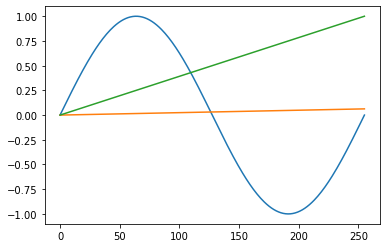

In [3]:
x = np.linspace(0,2*np.pi,256)
plt.plot(np.sin(x))
output = np.sin(x*0.01)
plt.plot(output)
output1=[float(i)/max(output) for i in output]
plt.plot(output1)

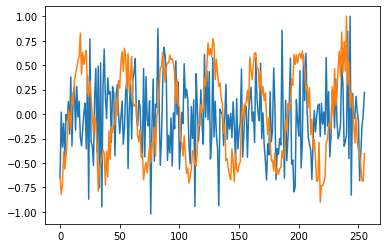

In [3]:
data = sin_generator.sin_gen3(10,10,0.001)
plt.plot(data[0][6])
plt.plot(data[0][0])

68


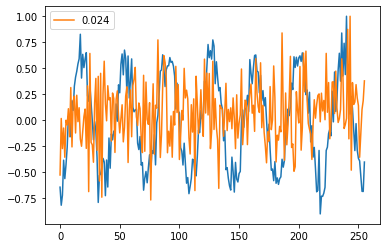

76


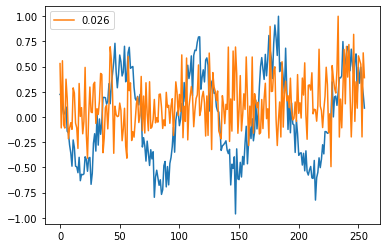

83


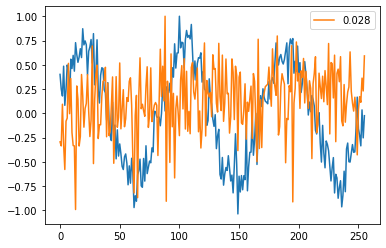

91


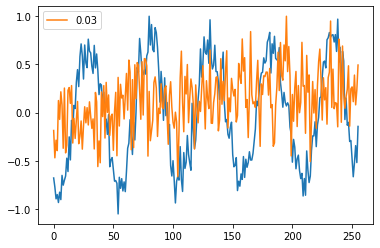

99


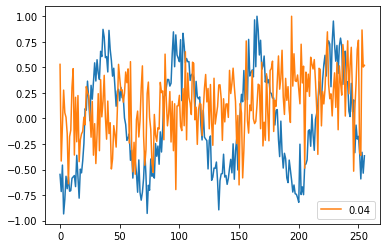

In [4]:
freqs = [0.024,0.026,0.028,0.03,0.04]
acc = [68,76,83,91,99]
i=0
for freq in freqs:    
    print(acc[i])
    dataset = sin_generator.sin_gen3(10,10,freq)
    plt.plot(dataset[0][0])
    plt.plot(dataset[0][6],label=str(freq))
    plt.legend()
    plt.show()
    i+=1

Text(0, 0.5, 'Test set accuracy')

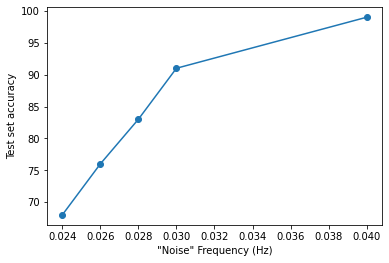

In [6]:
plt.plot(freqs, acc)
plt.scatter(freqs, acc)
plt.xlabel('"Noise" Frequency (Hz)')
plt.ylabel('Test set accuracy')

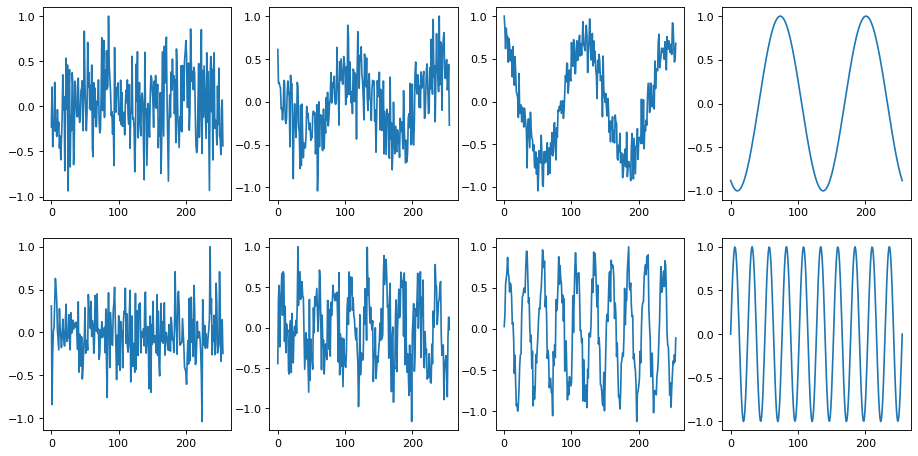

In [5]:
data = sin_generator.sin_gen2(0.1,10)
data2 = sin_generator.sin_gen2(1,10)
data3 = sin_generator.sin_gen2(10,10)
data4 = sin_generator.sin_gen2(0,10)
plt.figure(figsize=(14, 7), dpi=80)
plt.subplot(2,4,1)
plt.plot(data[0][0])
plt.subplot(2,4,2)
plt.plot(data2[0][0])
plt.subplot(2,4,3)
plt.plot(data3[0][0])
plt.subplot(2,4,4)
plt.plot(data4[0][0])
plt.subplot(2,4,5)
plt.plot(data[0][6])
plt.subplot(2,4,6)
plt.plot(data2[0][6])
plt.subplot(2,4,7)
plt.plot(data3[0][6])
plt.subplot(2,4,8)
plt.plot(data4[0][6])

In [8]:
a = [19.12169019554415, 14.930971157018595, 13.254639675541226, 11.54169051311386, 10.669074214817474, 8.736595681919809, 7.984997799589287, 7.1806502820229605, 6.342130528983516, 5.24396401921469, 5.4026124620763865, 5.305394092597138, 5.0070853988022845, 4.824807709237046, 4.822496629700029, 4.515494436157737, 4.284417507187598, 4.468473447386356, 4.302716034394731, 4.451416162963542, 4.156218562069352, 4.157480267242832, 3.952510293886917, 3.8245949443274045, 3.951933596779274, 4.065583175151958, 3.9129060314249515, 3.8538887685255157, 4.002654003619371, 3.8774285209202937, 3.7337455219301106, 4.18487698378949, 3.6231605410921013, 3.9715704807574483, 3.6143169740392347, 3.7126822982574303, 3.7654212588457265, 3.897056752449346, 3.6553757984504793, 3.6773255567325784, 3.957002316326483, 4.265270317379126, 3.669315327062417, 3.4443754900163244, 3.774370897784709, 3.769886770165439, 3.7709243607345546, 3.500402598778085, 3.6548618899602148, 3.810953176157095, 3.4046338780667833, 3.297868485769186, 3.2435147058017435, 3.32271796916813, 3.362922940469749, 3.750596046603271, 3.619127131939411, 3.1393772248312666, 3.3981063718512434, 3.556227659612273, 3.1657765055619134, 3.108749008342198, 3.3074347810765334, 3.244970940340705, 3.331279108618988, 3.221617806154652, 3.2734769451072467, 3.243476798604233, 3.276898697733018, 3.146978225595904, 3.0953406083682196, 3.1624187032468485, 3.0912403333457417, 3.1172945237647016, 3.0335741327412107, 3.1679289649604354, 3.1453157907915466, 3.096799098963923, 3.023593680609802, 3.0545585330368668, 3.1387622561479716, 3.121959829190086, 3.413367368590504, 3.1438840282661493, 2.9726338626985873, 2.8532646351730984, 3.019153828720771, 3.030767537530368, 3.0631982450553887, 3.018723232716063, 3.161979418355202, 3.0383504408794426, 2.962656307343256, 3.033272959649252, 3.034811113220862, 2.8767759430677478, 3.305223432505969, 2.769613587782621, 2.982072580824081, 3.341278614129261, 2.888250040330021, 2.9441048257404847, 3.1071355913130354, 3.041623259167097, 3.091460259704765, 2.8710299831982407, 2.9511611886523035, 2.7868476307039414, 2.9681262474207197, 3.032995984699183, 3.114850228909729, 2.9258254493257856, 2.861527329230148, 3.069455658058402, 2.875412447473654, 3.1126060079085107, 2.9932616956032296, 2.8574446122862045, 3.091607924139592, 2.868521802697711, 2.8863010112147665, 3.0326799408848104, 3.0641931544273744, 2.95106739236326, 2.8852997114902768, 2.910020948811102, 2.8050519370841767, 2.98052675652461, 2.7994002115145316, 3.014432531073399, 2.9922001367075595, 2.7419192830511845, 3.122908513029081, 2.8916428024810665, 2.7726244603644585, 3.0085002766415987, 2.8040477586468997, 3.0099488806882606, 2.793257939503936, 2.8463781509699855, 2.8853917337174786, 2.8338906008973024, 2.745324282699955, 2.7342938724082964, 2.8911865195309594, 2.770162967160282, 2.8726973116317325, 2.7503843557521575, 2.872586149559108, 2.712271291118801, 2.805873504768546, 2.854616670008486, 2.6544158031164566, 2.694782083188275, 2.796339297389007, 2.8080813230516144, 2.770320074094726, 2.7548327080053765, 2.7392502350969674, 2.5037449022969986, 2.78654011874775, 2.738615843046815, 2.6518569204095686, 2.7426833227694414, 2.582785528393751, 2.6451391070418406, 2.7378766981263962, 2.6380451260649087, 2.7447826591199584, 2.622906198421338, 2.6405189558777757, 2.712955186184761, 2.5958608329991653, 2.6872507285959895, 2.4690953837819833, 2.6164363548654817, 2.6219622602360984, 2.586932669657966, 2.592951123778615, 2.5781375229804384, 2.714138985028034, 2.5469439624632892, 2.5984304397061355, 2.536219192084929, 2.534012965749632, 2.6967925449914865, 2.5940008983957403, 2.585952302109631, 2.470026414108005, 2.516685930162458, 2.579144463973924, 2.5521845847903726, 2.4098301738996457, 2.6368175786990258, 2.586584307062015, 2.582443848237345, 2.651561817512271, 2.4462679804331855, 2.484346059815898, 2.4264008881877612]

print(a[4])

10.669074214817474


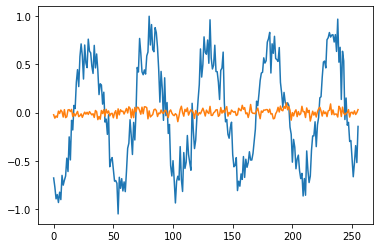

In [6]:
data = sin_generator.sin_gen(10,10)
plt.plot(data[0][0])
plt.plot(data[0][6])

In [7]:
data = sin_generator.sin_gen3(8,10,0.1)
plt.plot(data[0][0])
plt.plot(data[0][6])

AttributeError: module 'sin_generator' has no attribute 'sin_gen3'

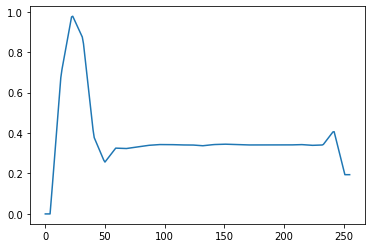

In [4]:
import mnist

X_train, X_test, Y_train, Y_test, x_train = mnist.data_load(classes=[0, 1])

plt.plot(X_train[1])

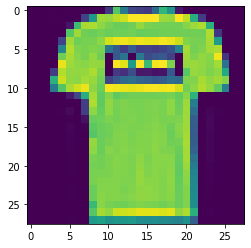

In [5]:
plt.imshow(x_train[1])

In [4]:
def sin_gen_3(snr_dB): #data_point sets number of datapoint in the time series
    
    data_length = 256
    x = np.linspace(0,2*np.pi,data_length) #create "time series" over period 2pi with data_length points 
    outputs = [] # initialize empty example and label arrays
    labels = []

    for i in range(0,10): #10000 total examples (training and test)

        f=np.random.randint(1,10)          #random freq and phase to give sin wave
        phase = np.random.randint(0,256)
        signal = np.sin((f*x)+phase)

        signal_avg_power_dB = 10 * np.log10(np.mean(signal**2))     #average of signal power in dB
        noise_power_dB = signal_avg_power_dB - snr_dB               #define noise with signal and snr
        noise_power = 10 ** (noise_power_dB / 10)                   #convert back to noise power
        noise = np.random.normal(0,np.sqrt(noise_power),data_length)   #normal dist. mean 0, st.dev. given by noise power
        
        if i < 5: #half of examples to be signal with noise
            output = signal + noise
            output=[float(i)/max(output) for i in output] #normalise data
            label = 1 
        else:       #half of examples only noise
            output = noise 
            output=[float(i)/max(output) for i in output] #normalise noise
            label = 0 #label corresponding to just noise is 0
    
        outputs.append(output) #add example to array
        labels.append(label) #add corresponding label to array
    
    dataset = [outputs, labels] #entire dataset contains all examples and their corresponding labels
    return(dataset)

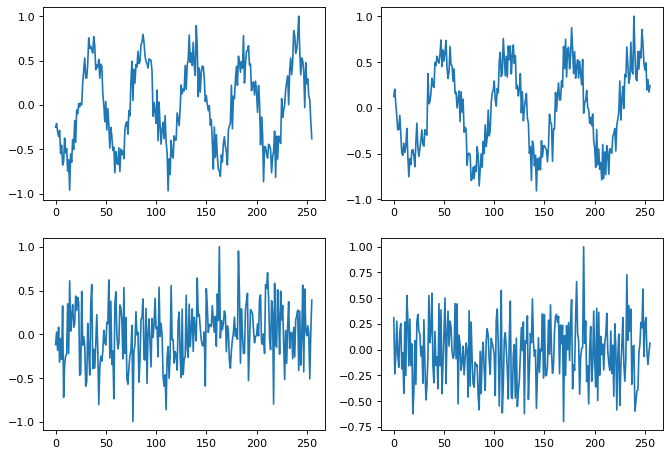

In [5]:
data = sin_gen_3(9)

plt.figure(figsize=(10, 7), dpi=80)
plt.subplot(2,2,1)
plt.plot(data[0][0])
plt.subplot(2,2,2)
plt.plot(data[0][1])
plt.subplot(2,2,3)
plt.plot(data[0][6])
plt.subplot(2,2,4)
plt.plot(data[0][7])

In [10]:
import mnist

X_train, X_test, Y_train, Y_test, x_train = mnist.data_load(classes=[0, 1])

plt.plot(X_train[0])

ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
plt.imshow(x_train[0])

NameError: name 'x_train' is not defined

In [6]:
def sin_gen_3(snr): #data_point sets number of datapoint in the time series
    
    data_length = 256
    x = np.linspace(0,2*np.pi,data_length) #create "time series" over period 2pi with data_length points 
    outputs = [] # initialize empty example and label arrays
    labels = []

    for i in range(0,10): #10000 total examples (training and test)

        f=np.random.randint(1,10)          #random freq and phase to give sin wave
        phase = np.random.randint(0,256)
        signal = np.sin((f*x)+phase)
        sig_avg_power = np.mean(signal**2)
        noise_power = sig_avg_power / snr
        noise = np.random.normal(0,np.sqrt(noise_power),data_length)   #normal dist. mean 0, st.dev. given by noise power
        
        if i < 5: #half of examples to be signal with noise
            output = signal + noise
            output=[float(i)/max(output) for i in output] #normalise data
            label = 1 
        else:       #half of examples only noise
            output = noise 
            output=[float(i)/max(output) for i in output] #normalise noise
            label = 0 #label corresponding to just noise is 0
    
        outputs.append(output) #add example to array
        labels.append(label) #add corresponding label to array
    
    dataset = [outputs, labels] #entire dataset contains all examples and their corresponding labels
    return(dataset)

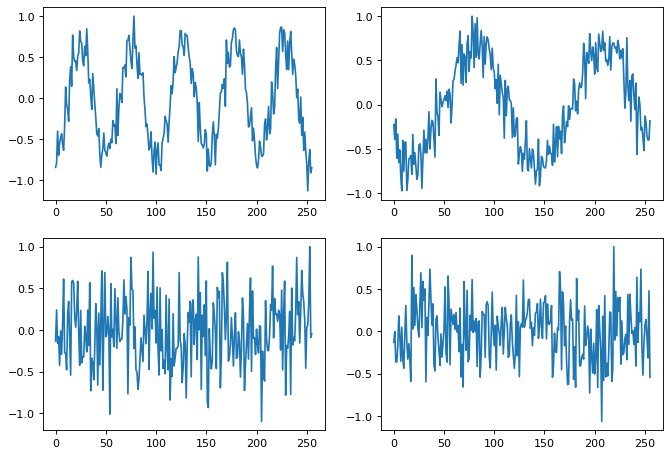

In [7]:
data = sin_gen_3(8)

plt.figure(figsize=(10, 7), dpi=80)
plt.subplot(2,2,1)
plt.plot(data[0][0])
plt.subplot(2,2,2)
plt.plot(data[0][1])
plt.subplot(2,2,3)
plt.plot(data[0][6])
plt.subplot(2,2,4)
plt.plot(data[0][7])

In [1]:
import re
import numpy as np


pair = re.compile(r'\(([^,\)]+),([^,\)]+)\)')
def parse_pair(s):
    return complex(*map(float, pair.match(s).groups()))

In [2]:
fname =r'C:\Users\ivoll\OneDrive\Documents\qml_sin-3 copy\Quantum_data\qdata_10000_0.1.txt'
with open(fname) as f:
    lines = f.readlines()
    all=''.join(lines)
    allstates=all.split(')], ')
    #print(len(allstates))
    labels=allstates[1]
    labels=labels[:-1]
    labels=labels.strip(']')
    labels=labels.strip('[')
    labels=labels.split(',')
    #print(labels)
    #print(all[len(labels):])
    #all= all[:len(labels)]
    #all = all.replace('[array(','')
    all = all.split('),')
    #print(all)
    print(len(all))
    jj=0
    all_new=[]
    for item in all:
    #    print(item)
        item = item.replace('[array(','')
        item = item.replace('rray([','')
        item=item[2:-1]
        #print(item)
        item=item.replace('\n       ','')
        item=item.replace('  ','')
        item=item.replace(' ','')
        item=item.split(',')
        #print(item)
        #print(len(item))
        #print(jj,len(item))

        if jj == 9999:
            
            item=';'.join(item)
            #print(item)
            item=item.split(')')
            item=item[0]
            item=item[:-1]
            #print(item)
            item=item.split(';')
            print('testsdvhfsuyds',len(item))
        if len(item) == 256:
            gg=np.array()
            for i in item:
                #try:
                h=complex(i)
                gg= np.append(gg,h)
                #except:
                #print(i)
                #print(i)
            
        #    break
            jj=jj+1
        #break
        all_new.append(gg)
print(len(all_new))
output=[all_new,labels]
#print(output)
print('jj:',jj)

    #for line in lines:
    #    print(line)

10000


NameError: name 'np' is not defined